### 1. Exploratory Data Analysis (EDA)

* Inspect class balance (number of "yes" vs. "no" images)
* Inspect images size and standardize if necessary (e.g., 128x128 or 224x224)
* Check pixel intensity distribution (to check if resizing is necessary)
* Normalize pixel values to [0,1]


# Week 1: Setup + EDA

#### 1. Import Libraries

In [46]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Import Data

In [60]:
data_dir = "../../../../env/brain_tumor_dataset"

In [61]:
number_files_yes = len(os.listdir(os.path.join(data_dir, "yes")))
number_files_no = len(os.listdir(os.path.join(data_dir, "no")))

print(f"Tumor images:    {number_files_yes}")
print(f"No tumor images:  {number_files_no}")
print(f"Total images:    {number_files_yes + number_files_no}")

Tumor images:    155
No tumor images:  98
Total images:    253


In [32]:
Imbalance_Ratio = number_files_yes / number_files_no
print(f"Class Imbalance Ratio (yes:no) = {Imbalance_Ratio:.2f}:1")

Class Imbalance Ratio (yes:no) = 1.58:1


In [43]:
images = []

In [44]:
for x in {"yes","no"}:
    paths = data_dir + "/" + x
    for filename in os.listdir(paths):
        ext = os.path.splitext(filename)[-1].lower()

        path = os.path.join(data_dir, x, filename)
        img = cv2.imread(path)
        if img is not None:
            height, width = img.shape[:2]
            images.append({'filename': filename, 'width': width, 'height': height, 'aspect_ratio': width / height if height > 0 else 0})
        else:
            images.append({'filename': filename, 'width': None, 'height': None, 'aspect_ratio': None}) # in case of read failure

# Convert to DataFrame
df = pd.DataFrame(images)

In [ ]:
df.head()

,filename,width,height,aspect_ratio
0,Y23.JPG,272,277,0.981949
1,Y162.jpg,1059,1200,0.882500
2,Y37.jpg,319,360,0.886111
3,Y184.JPG,189,173,1.092486
4,Y46.jpg,634,929,0.682454


In [55]:
df.describe()

,width,height,aspect_ratio
count,253.000000,253.000000,253.000000
mean,354.237154,386.019763,0.919033
std,217.111684,213.128463,0.168495
min,150.000000,168.000000,0.682454
25%,225.000000,248.000000,0.815789
50%,278.000000,331.000000,0.882500
75%,400.000000,442.000000,1.000000
max,1920.000000,1427.000000,1.785714


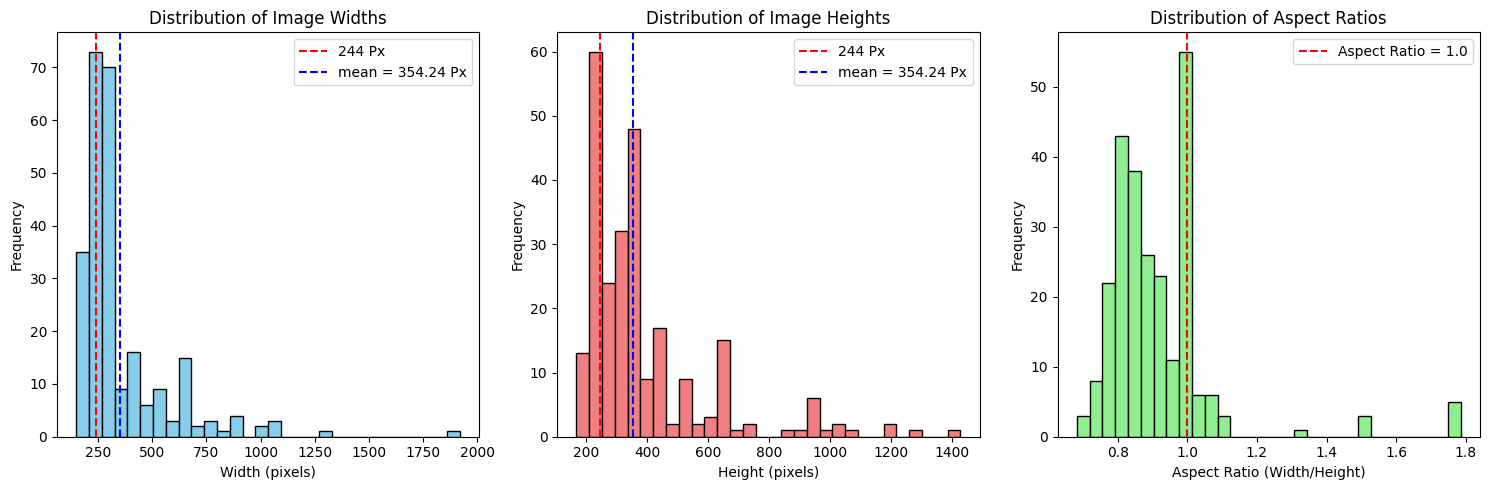

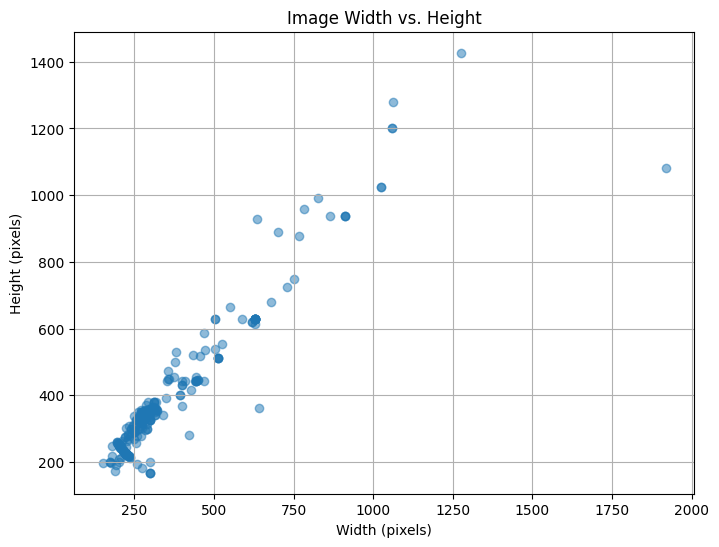

In [63]:
plt.figure(figsize=(15, 5))

# Histogram of Widths
plt.subplot(1, 3, 1)
plt.hist(df['width'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Image Widths')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')
plt.axvline(244, color='red', linestyle='--', label='244 Px')
plt.axvline(354, color='blue', linestyle='--', label='mean = 354.24 Px')
plt.legend()

# Histogram of Heights
plt.subplot(1, 3, 2)
plt.hist(df['height'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribution of Image Heights')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')
plt.axvline(244, color='red', linestyle='--', label='244 Px')
plt.axvline(354, color='blue', linestyle='--', label='mean = 354.24 Px')
plt.legend()

# Histogram of Aspect Ratios
plt.subplot(1, 3, 3)
plt.hist(df['aspect_ratio'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Aspect Ratios')
plt.xlabel('Aspect Ratio (Width/Height)')
plt.ylabel('Frequency')
plt.axvline(1.0, color='red', linestyle='--', label='Aspect Ratio = 1.0')
plt.legend()

plt.tight_layout()
plt.show()

# Scatter plot of Width vs Height
plt.figure(figsize=(8, 6))
plt.scatter(df['width'], df['height'], alpha=0.5)
plt.title('Image Width vs. Height')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.grid(True)
plt.show()

#### Pixel Intensity

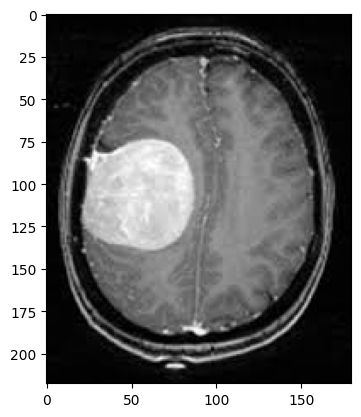

[[3 3 3 ... 2 2 2]
 [3 3 3 ... 2 2 2]
 [3 3 3 ... 2 2 2]
 ...
 [2 2 2 ... 2 3 3]
 [2 2 2 ... 1 1 2]
 [2 2 2 ... 1 1 2]]


(np.uint8(0), np.uint8(255))

In [78]:
ex_img = data_dir + "/yes/Y1.jpg"
img = cv2.imread(ex_img,0)
plt.imshow(img, cmap='gray')
plt.show()
print(img)
img.min(), img.max()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


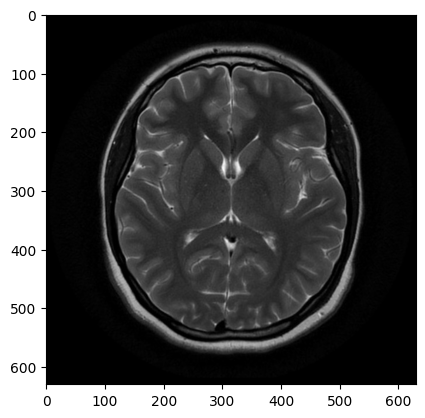

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(np.uint8(0), np.uint8(248))

In [ ]:
ex_img = data_dir + "/no/1 no.jpeg"
img = cv2.imread(ex_img,0)
print(img)
plt.imshow(img, cmap='gray')
plt.show()
img.min(), img.max()

### Resize Images